# Exploratory Analysis of Stack Overflow's Yearly Survey 2023.
# (Please note this is actively in progress, it is a rough draft)

## Analyzing the Correlation Between Demographics, Mental Health, and Workplace Culture in a Survey of Stack Overflow Members.

  Stack Overflow, founded in 2008, is a website where people ask and answer programming questions to help each other out. It is widely used by programmers of all levels and backgrounds, but it is particularly popular among software developers who work with web development, mobile development, and data science.  It publishes the data of the survey of its members yearly.


# General Demographics Overview
## Age, Gender, Years code, Mental Health , Education Level, Language Used

In [1]:
# This cell is to import need libraries/packages and datasets. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Datasets have been cleaned in previous notebooks.

#df_whole is a copy of the original Data frame, with large amounts of cleaning and parsing to allow for plotting.
df_whole = pd.read_csv("df_whole.csv")
#df_lang is a dataframe modified from df_whole, the answer to the languages used question have been exploaded out to get counts per mention.
df_lang = pd.read_csv("df_lang.csv")
#df_whole_45 is a subset of the original data frame that only includes the top 45 countries by participation.
df_whole_45 = pd.read_csv('df_whole_45.csv')
#df_45 is a new data frame created from df_whole_45 that has means, medians and participation counts for categories grouped by country.
df_45 = pd.read_csv("df_45_clean.csv")


#df is the original df.
df = pd.read_csv('data/survey_results_public.csv')


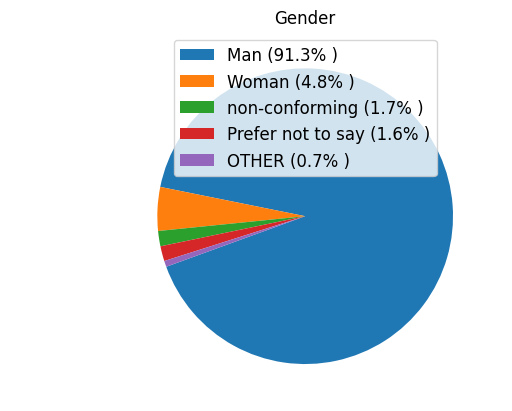

Participation in Gender question is: 70505 / 71331


<Figure size 640x480 with 0 Axes>

In [2]:
#Gender Chart Creation Code:

#df_copy
gender =df_whole.value_counts('Gender')

# Get value counts without the "Man;Woman" category
gender.drop("Man;Woman", inplace=True)

# Function putting counts into percentages
percentages = []
for count in gender:
    percentage = count / sum(gender) * 100
    percentages.append(f'{percentage:.1f}% ')
    
#creating pie chart
plt.pie(gender, labels=gender.index, autopct='', startangle=200, textprops={'color': 'w', 'fontsize': 12})
plt.title('Gender')

# add percentages
plt.legend(labels=[f'{l} ({p})' for l, p in zip(gender.index, percentages)], prop={'size': 12}, loc=9)
# Move legend outside of the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#saving as image- still not working!!!
GenderSOF = plt.savefig('GenderSOF.png')

# Recording participation: 
x = df_whole['Gender'].count()
y = len(df_whole)

print(f'Participation in Gender question is: {x} / {y}')


The gender distribution of the individuals shows 91.3% male identification. This indicates a significant gender disparity within the tech industry, with men being the dominant group. However, it is important to note that this underrepresentation of women in tech is a well-known issue.

Contrary to the observed gender distribution from the SOF data, other reputable sources report a higher percentage of women in the tech industry. According to the National Center for Women & Information Technology (NCWIT) in the United States, women accounted for approximately 26% of the computing workforce in 2020. 

The numbers from SOF are global, and as we will see later are also mostly developers. While there are inumerable reasons for statistics to vary from source to source. This is somethinig to keep in mind when you hear/ see this data used in descision making. (1)(2)(3)

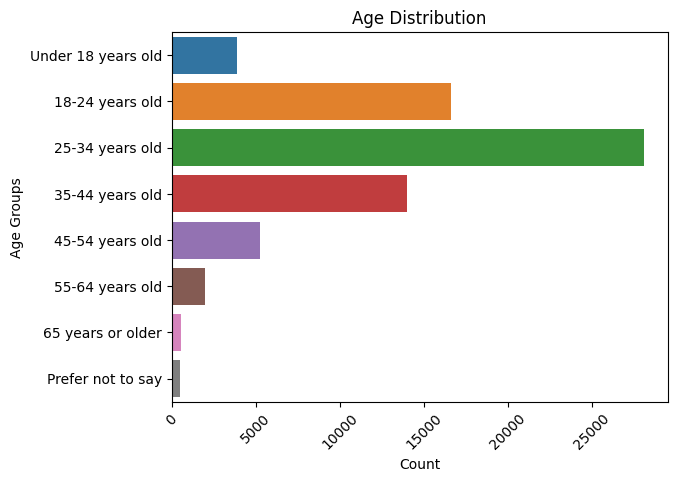

In [3]:
#Age Plot Creation Code:

age_counts = df['Age'].value_counts()

age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

sns.barplot(x=age_counts, y=age_counts.index, order=age_order, orient='h')

plt.ylabel('Age Groups')
plt.xlabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

Discussion on age and years code:

12.251307285752338

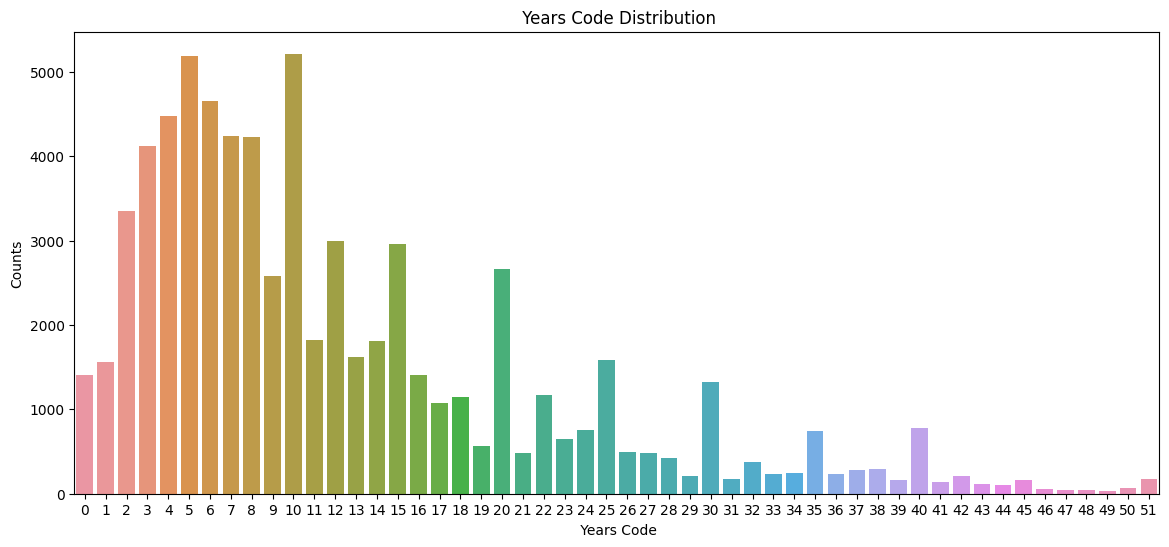

In [4]:
#Years Code Plot Creation Code:
df_whole_45['YearsCode'].unique()
display(df_whole['YearsCode'].mean())
df_whole['YearsCode'].median() 


Years_Code_Counts = df_whole['YearsCode'].value_counts()


# Increase the figure size
plt.figure(figsize=(14, 6))

sns.barplot(y=Years_Code_Counts, x=Years_Code_Counts.index, )


plt.xlabel(' Years Code')
plt.ylabel('Counts')
plt.title(' Years Code Distribution')
#plt.xticks(rotation=45)
plt.show()

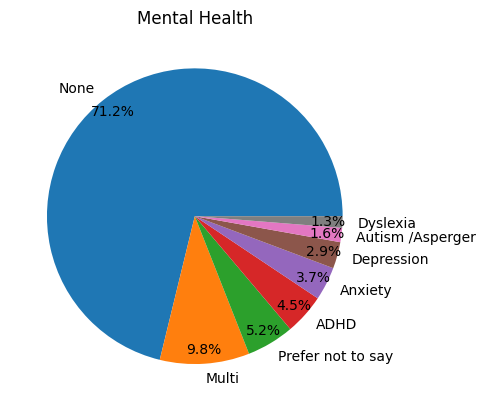

Participation in Mental Health question is: 66198 / 71331


In [5]:
#Mental Health Plot Creation Code:

# create the series
s = df_whole['MentalHealth'].value_counts()

# Get value counts without the "in your own words" category
s.drop("Or, in your own words:", inplace=True)

# plot as a pie chart
plt.pie(s, labels=s.index, autopct='%1.1f%%', pctdistance=.9)
plt.title('Mental Health')
plt.show()

# Recording participation: 
x = df_whole['MentalHealth'].count()
y = len(df_whole)

print(f'Participation in Mental Health question is: {x} / {y}')


Participation in Ed Level question is: 71204 / 71331


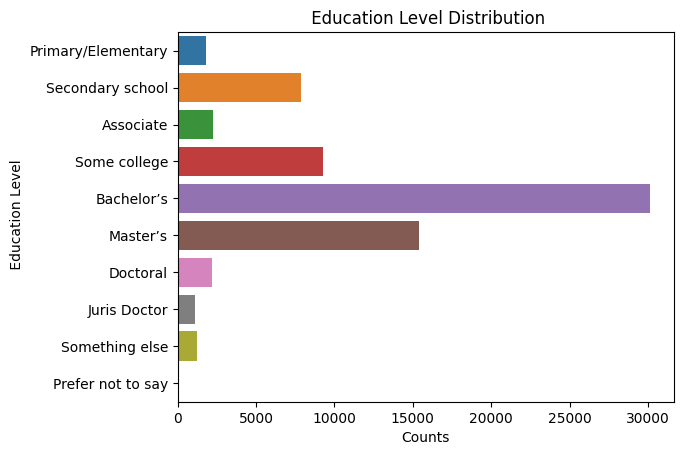

In [6]:
#Education Plot Creation Code:


# Recording participation: 
xx = df_whole['EdLevel'].count()
yy = len(df_whole)

print(f'Participation in Ed Level question is: {xx} / {yy}')

Ed_level_order = [
    'Primary/Elementary',
    'Secondary school',
    'Associate',
    'Some college',
    "Bachelor’s" ,
    "Master’s",
    "Doctoral",
    'Juris Doctor',
    'Something else',
    'Prefer not to say'
]


Ed_Level_Counts = df_whole['EdLevel'].value_counts()


sns.barplot(y=Ed_Level_Counts.index, x=Ed_Level_Counts, order = Ed_level_order, orient='h')

plt.ylabel(' Education Level')
plt.xlabel('Counts')
plt.title(' Education Level Distribution')
plt.show()

Participation in Language Have Worked With question is: 70593 / 71331


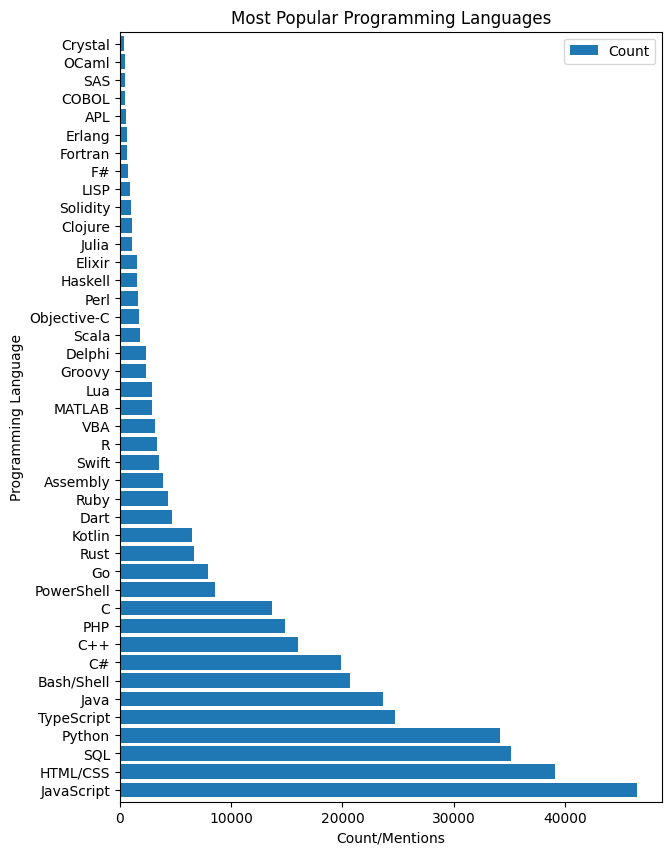

In [7]:
#Popular Programming Languages Plot Creation Code:
# plot the bar graph
df_lang.plot(kind='barh', x='LanguageHaveWorkedWith', y='Count', figsize=(7, 10), width=0.8)

# set the title and labels for the graph
plt.title('Most Popular Programming Languages')
plt.xlabel('Count/Mentions')
plt.ylabel('Programming Language')

# Recording participation:
xxx = df_whole['LanguageHaveWorkedWith'].count()
yyy = len(df_whole)

print(f'Participation in Language Have Worked With question is: {xxx} / {yyy}')

plt.show()

In [8]:
# Count the rows containing 'Developer' in the 'DevType' column
count = df['DevType'].str.contains('Developer').sum()

# Print the count
print(f"Total number of rows containing 'Developer': {count}")

# Count the total number of non-null rows in the 'DevType' column
total_non_na_rows = df['DevType'].count()

# Print the count
print(f"Total number of non-null rows in 'DevType': {total_non_na_rows}")

#Print percent developers

perc = (count/total_non_na_rows)*100

print(f"Percentage Developers: {perc:.2f}%")

Total number of rows containing 'Developer': 51926
Total number of non-null rows in 'DevType': 61302
Percentage Developers: 84.71%


# By Country Demographics Overview
## Age, Years code, Salary , Education Level

In [9]:
df_45



,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
0,United States of America,13543,58.23%,85.87%,"$160,561.30","$140,000.00",60.58%,16.9,14.0,36.3,Bachelor’s
1,India,6639,39.84%,73.79%,"$38,270.20","$18,223.80",31.81%,8.8,8.0,28.2,Bachelor’s
2,Germany,5395,34.39%,83.97%,"$98,732.30","$69,677.40",53.20%,15.6,14.0,33.8,Master’s
3,United Kingdom of Great Britain and Northern I...,4190,42.85%,85.32%,"$132,061.60","$79,268.30",61.17%,16.4,14.0,34.8,Bachelor’s
4,Canada,2490,62.40%,84.18%,"$107,117.40","$86,861.30",56.99%,16.0,14.0,35.0,Bachelor’s
5,France,2328,23.03%,83.93%,"$78,165.20","$51,612.90",58.33%,13.8,12.0,32.6,Master’s
6,Brazil,2109,66.77%,88.62%,"$39,287.40","$25,142.90",60.41%,12.2,10.0,31.5,Bachelor’s
7,Poland,1732,54.61%,83.83%,"$57,862.60","$46,419.10",56.29%,12.4,11.0,31.6,Master’s
8,Netherlands,1555,18.74%,85.79%,"$93,454.00","$64,828.00",57.04%,15.3,13.0,33.8,Bachelor’s
9,Spain,1521,49.82%,88.95%,"$94,820.50","$48,387.10",64.63%,13.9,12.0,34.2,Bachelor’s


The DataFrame 'DF_45' represents the data cleaned in the "General Demographics by Country" notebook. It focuses on 45 countries with the largest participant counts. The number 45 was chosen arbitrarily to save time during currency conversion. Any country with fewer than 316 participants was excluded, initially there had been 180 countries. This process led to a loss of approximately 12% of the data, primarily from smaller and poorer countries. I apologize for this inconvenience, and in no way say that data is unimportant.

To calculate the mean and median salary, I followed these steps:

1. Create a dictionary of conversion rates. Data was taken from google converter 3/14/2023 and 4/5
2. Apply the conversions to a new column in the DataFrame.
3. Multiply the resulting column by the pay frequency (weekly, monthly, yearly).
4. Remove outliers. It's important to note that there were individuals who provided extreme and erroneous values, those who didn't understand how to answer the pay frequency question correctly, and those who didn't answer enough questions to calculate the corrected yearly converted salary. 
5. Remove 'YearlyTotConvertCOMP' values below \\$1,500 and above \\$999,999.

The intention behind these calculations was to convert the salary into USD for total yearly compensation, accounting for any potential incorrect currency or interval selections.

The shape of the DataFrame initially stood at (64084, 80), comprising a vast population of individuals. However, upon removing outliers, the shape dwindled to (33561, 80), resulting in a staggering loss of participants. 

I must emphasize that this portion of my reporting is still undergoing research. The intricacies surrounding salary reporting alone warrant an entire project dedicated to its analysis. The observed variability in the reported salaries raises numerous intriguing questions. Not only did a considerable sum of individuals opt to input near-zero values rather than declining to answer, but there were also cases where people entered obscene numbers. Even attempting to establish upper and lower bounds proved challenging due to the presence of outliers that persisted within the data frame.

This leads me to ponder: Why would well-educated, well-compensated individuals generally residing in English-speaking countries provide erroneous answers? I am sure some were by mistake, but instead of simply declining to answer the question, why choose to be intentionally detrimental to the accuracy of the results?

While Stack Overflow states that they removed the top 2% of salaries for each country when they did thier analysis, I question the sufficiency of this approach. Curiously, their methodology section remains silent on the topic of removing lower bounds for any of the countries. This leaves room for further exploration and scrutiny regarding the handling of outliers in the dataset.(4)

To gain insights into the distribution of reported salaries across different countries, I aim to create individual box and whisker plots for each country and visualize them collectively. By combining these plots with a summary of percentages for students,newer coders reporting salaries, and cost of living in each country we can potentially uncover the sources of the prevalent near-zero salary values. Additionally, I'm intrigued by exploring the relationship between salary and years of coding experience among respondents who claim expert level experience, possess higher education qualifications, and hail from first-world countries. Examining these factors collectively could provide valueble insights on data quality.
 

The rest of the notebook goes through less intensive calculations to gather the following information:

# Need to put overveiw of other notebook calculations here



### Here are the top 3 and bottom 3 values when sorting the df_45 data frame by different categories: 

 - Top reported fully Remote Countries vs Countries with the lowest reported Fully Remote workers
 - Highest Average Age countries vs lowest average age countries
 - Highest Average experience level vs lowest average experience levels (Years_code)
 - Median Salary for each country, top 3 highest and bottom 3 lowest
 - % participation or non-NAN responses per total country count
 
 
Note: All columns, except for Work location participation, had similar participation counts, indicating that if respondents answered the salary question, they generally answered the others as well.

#comments on this will be added once the individual salary investigation is complete. I may adjust how I calculate outliers and or how I choose to remove rows from Df_45.

    



In [10]:
# Need to comment out this line when running cell consecutively
df_45['Fully Remote'] = df_45['Fully Remote'].str.replace('%', '').astype(float)

Remote_w_sort = df_45.sort_values('Fully Remote', ascending = False)

Remote_work_high_low = pd.concat([Remote_w_sort.head(3), Remote_w_sort.tail(3)])
Remote_work_high_low['Fully Remote'] = Remote_work_high_low['Fully Remote'].apply(lambda x: '{:.2f}%'.format(x))

Remote_work_high_low


,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
41,Colombia,341,76.51%,87.39%,"$38,394.70","$22,771.10",56.01%,10.4,8.0,30.3,Bachelor’s
24,Ukraine,593,71.92%,83.47%,"$42,173.70","$36,048.70",39.80%,11.8,10.0,31.4,Master’s
6,Brazil,2109,66.77%,88.62%,"$39,287.40","$25,142.90",60.41%,12.2,10.0,31.5,Bachelor’s
15,Switzerland,932,13.01%,87.45%,"$127,963.50","$116,483.50",51.82%,15.9,15.0,34.1,Bachelor’s
34,Norway,479,9.28%,89.98%,"$115,948.90","$76,628.40",64.51%,16.0,14.0,35.9,Master’s
29,Denmark,547,8.26%,86.29%,"$100,068.00","$90,571.00",61.06%,16.3,14.0,35.4,Master’s


In [11]:
Age_sort = df_45.sort_values('Mean Age', ascending = False)

Age_high_low = pd.concat([Age_sort.head(3), Age_sort.tail(3)])
Age_high_low


,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
37,New Zealand,440,33.51,83.41%,"$109,064.90","$80,063.30",60.23%,19.5,16.0,37.0,Bachelor’s
11,Australia,1462,36.28,83.52%,"$110,757.70","$86,666.70",54.72%,17.9,15.0,36.4,Bachelor’s
0,United States of America,13543,58.23,85.87%,"$160,561.30","$140,000.00",60.58%,16.9,14.0,36.3,Bachelor’s
1,India,6639,39.84,73.79%,"$38,270.20","$18,223.80",31.81%,8.8,8.0,28.2,Bachelor’s
19,Pakistan,711,28.03,81.29%,"$15,187.40","$6,244.60",36.99%,7.7,6.0,27.4,Bachelor’s
44,Viet Nam,317,15.81,67.82%,"$39,314.60","$12,783.60",28.08%,7.6,6.0,27.2,Bachelor’s


In [12]:
YearsCode_sort = df_45.sort_values('Median YearsCode', ascending = False)

YearsCode_high_low = pd.concat([YearsCode_sort.head(3), YearsCode_sort.tail(3)])
YearsCode_high_low

,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
37,New Zealand,440,33.51,83.41%,"$109,064.90","$80,063.30",60.23%,19.5,16.0,37.0,Bachelor’s
11,Australia,1462,36.28,83.52%,"$110,757.70","$86,666.70",54.72%,17.9,15.0,36.4,Bachelor’s
15,Switzerland,932,13.01,87.45%,"$127,963.50","$116,483.50",51.82%,15.9,15.0,34.1,Bachelor’s
19,Pakistan,711,28.03,81.29%,"$15,187.40","$6,244.60",36.99%,7.7,6.0,27.4,Bachelor’s
44,Viet Nam,317,15.81,67.82%,"$39,314.60","$12,783.60",28.08%,7.6,6.0,27.2,Bachelor’s
32,Nigeria,517,51.72,56.09%,"$24,690.40","$14,854.70",23.02%,6.5,5.0,28.3,Bachelor’s


In [13]:
# Need to comment out this line when running cell consecutively
df_45['Median Salary'] = df_45['Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)
salary_sort = df_45.sort_values('Median Salary', ascending = False)

salary_high_low = pd.concat([salary_sort.head(3), salary_sort.tail(3)])
salary_high_low['Median Salary'] = salary_high_low['Median Salary'].apply(lambda x: '${:,.2f}'.format(x))
salary_high_low

C:\Users\Adison\AppData\Local\Temp\ipykernel_20024\3004566480.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_45['Median Salary'] = df_45['Median Salary'].str.replace('$', '').str.replace(',', '').astype(float)


,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
0,United States of America,13543,58.23,85.87%,"$160,561.30","$140,000.00",60.58%,16.9,14.0,36.3,Bachelor’s
17,Israel,795,14.12,84.65%,"$123,715.40","$118,994.40",48.93%,14.1,12.0,34.8,Bachelor’s
15,Switzerland,932,13.01,87.45%,"$127,963.50","$116,483.50",51.82%,15.9,15.0,34.1,Bachelor’s
30,Indonesia,537,37.80,69.46%,"$19,946.30","$8,403.00",29.05%,9.3,8.0,28.7,Bachelor’s
23,Bangladesh,613,29.69,68.68%,"$16,209.70","$7,812.50",33.12%,7.8,7.0,29.2,Bachelor’s
19,Pakistan,711,28.03,81.29%,"$15,187.40","$6,244.60",36.99%,7.7,6.0,27.4,Bachelor’s


In [14]:
# Need to comment out this line when running cell consecutively
df_45['Salary Participation'] = df_45['Salary Participation'].str.replace('%', '').astype(float)

Participation_sort = df_45.sort_values('Salary Participation', ascending = False)

Participation_high_low = pd.concat([Participation_sort.head(3), Participation_sort.tail(3)])
Participation_high_low['Salary Participation'] = Participation_high_low['Salary Participation'].apply(lambda x: '{:.2f}%'.format(x))

Participation_high_low

,Country,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
9,Spain,1521,49.82,88.95%,"$94,820.50",48387.1,64.63%,13.9,12.0,34.2,Bachelor’s
34,Norway,479,9.28,89.98%,"$115,948.90",76628.4,64.51%,16.0,14.0,35.9,Master’s
14,Sweden,1020,17.93,86.96%,"$77,405.30",57692.3,64.31%,16.7,15.0,35.8,Master’s
38,Egypt,400,42.91,65.25%,"$15,051.20",9029.1,28.00%,8.6,7.0,29.8,Bachelor’s
21,China,632,17.01,61.39%,"$65,193.40",43604.7,24.68%,10.4,8.0,30.8,Bachelor’s
32,Nigeria,517,51.72,56.09%,"$24,690.40",14854.7,23.02%,6.5,5.0,28.3,Bachelor’s


Text(0.5, 1.0, 'Education Level Distribution by Country')

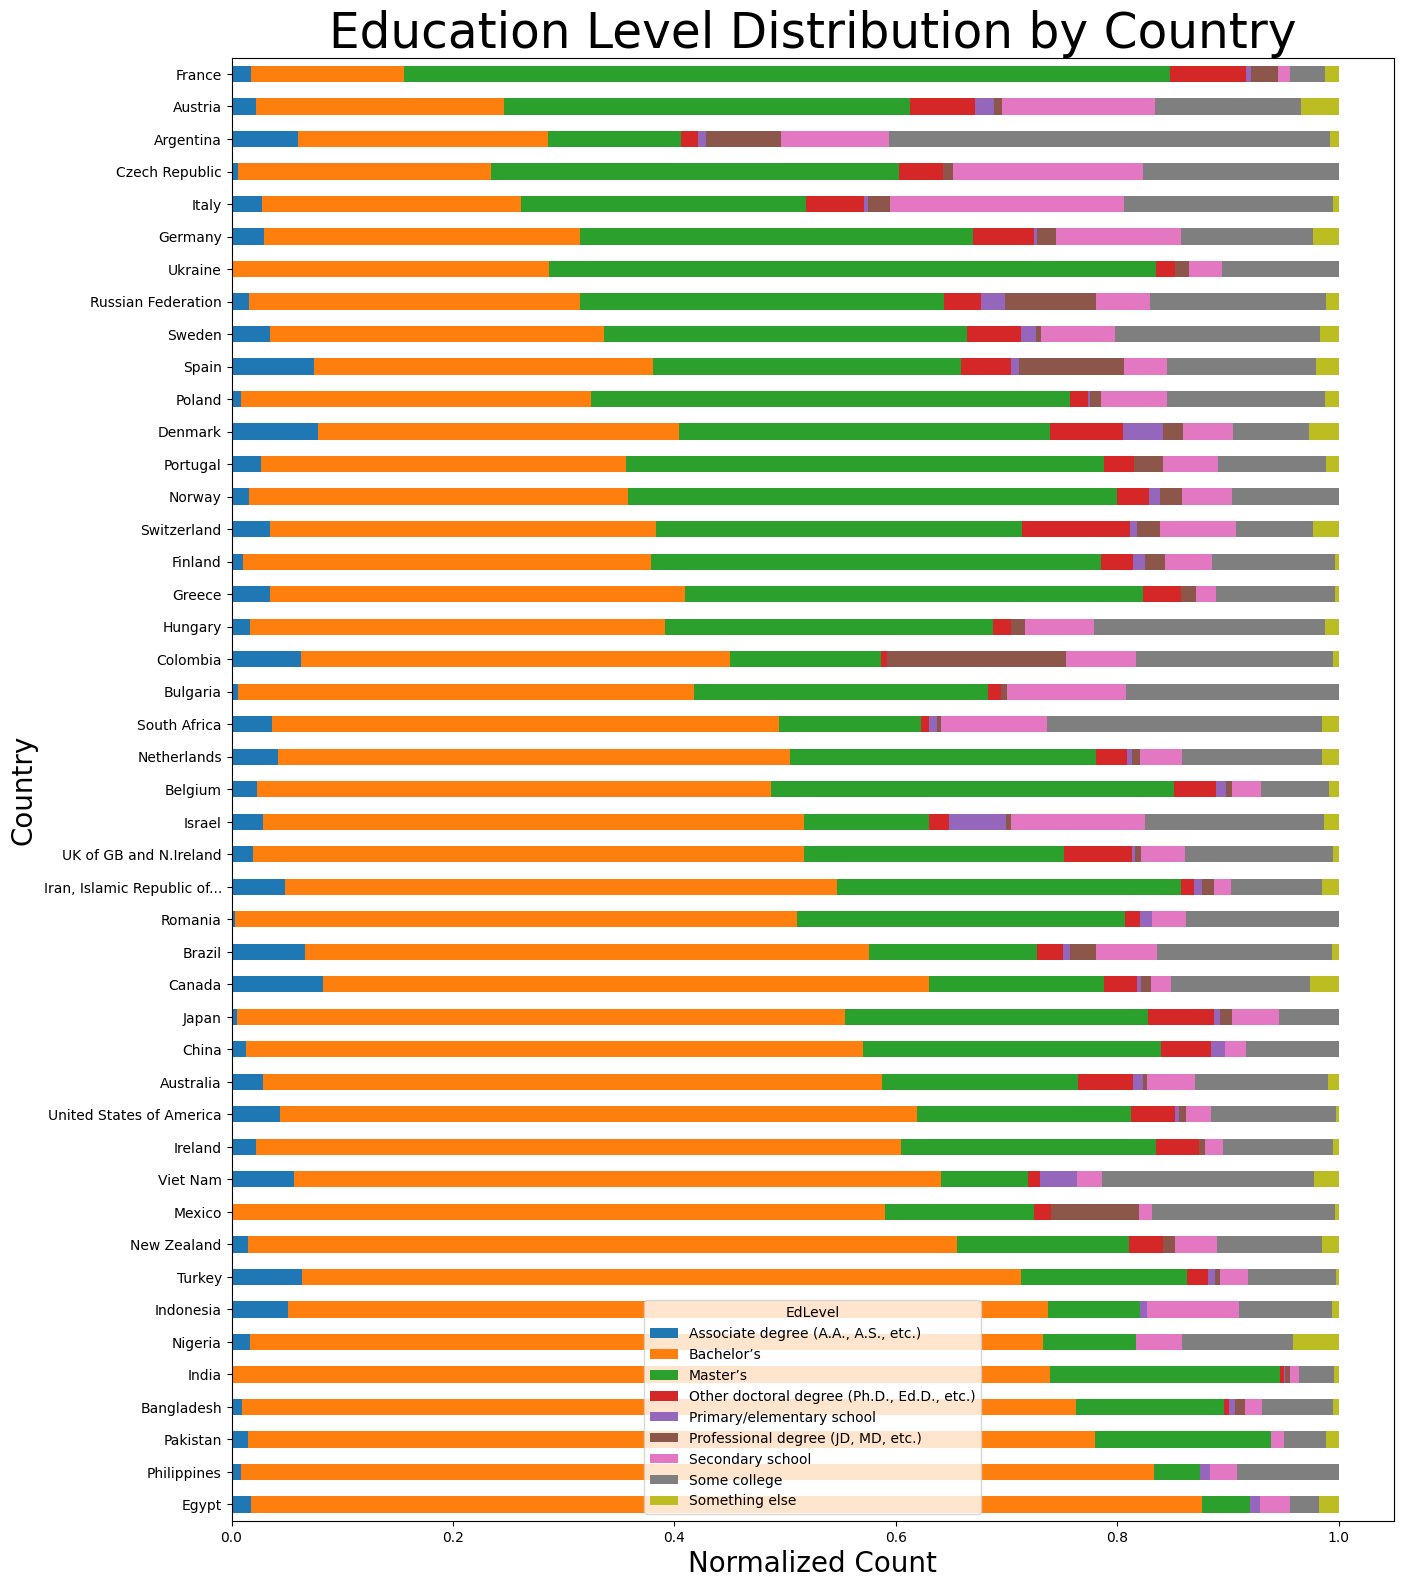

In [18]:
# Group by country:
country_grp = df_whole_45.groupby(['Country'])

# get percent of Education Level for each country
country_grp['EdLevel'].value_counts(normalize = True)

# Turn into a stacked bar chart

# unstack series into a dataframe 
edlevel_counts = country_grp['EdLevel'].value_counts(normalize=True)
edlevel_counts = edlevel_counts.unstack()

# adjustments for athstetics
edlevel_counts.rename(columns={'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary school'}, inplace=True)
edlevel_counts.rename(index={'United Kingdom of Great Britain and Northern Ireland': 'UK of GB and N.Ireland'}, inplace=True)
#edlevel_counts = edlevel_counts.sort_index(ascending=False)
#Sort the countries based on the size of the normalized "Bachelor's" column
edlevel_counts = edlevel_counts.sort_values(by="Bachelor’s", ascending=False)

#----OPTION TO ADJUST HOW YOU SEE FIT----- (uncomment out any '###' and re-run cell)
# Sort the countries based on the size of the normalized "Associate degree (A.A., A.S., etc.)" column
###edlevel_counts = edlevel_counts.sort_values(by='Associate degree (A.A., A.S., etc.)', ascending=False)

# Sort the countries based on the size of the normalized "Bachelor’s" column
###edlevel_counts = edlevel_counts.sort_values(by='Bachelor’s', ascending=False)

# Sort the countries based on the size of the normalized "Master’s" column
###edlevel_counts = edlevel_counts.sort_values(by='Master’s', ascending=False)

# Sort the countries based on the size of the normalized "Other doctoral degree (Ph.D., Ed.D., etc.)" column
###edlevel_counts = edlevel_counts.sort_values(by='Other doctoral degree (Ph.D., Ed.D., etc.)', ascending=False)

# Sort the countries based on the size of the normalized "Primary/elementary school" column
###edlevel_counts = edlevel_counts.sort_values(by='Primary/elementary school', ascending=False)

# Sort the countries based on the size of the normalized "Professional degree (JD, MD, etc.)" column
###edlevel_counts = edlevel_counts.sort_values(by='Professional degree (JD, MD, etc.)', ascending=False)

# Sort the countries based on the size of the normalized "Secondary school" column
###edlevel_counts = edlevel_counts.sort_values(by='Secondary school', ascending=False)

# Sort the countries based on the size of the normalized "Some college" column
###edlevel_counts = edlevel_counts.sort_values(by='Some college', ascending=False)




# Plot the stacked bar chart with inverted axes and adjusted dimensions
edlevel_counts.plot.barh(stacked=True, figsize=(15, 19))

# Add labels and title
plt.ylabel('Country', fontsize=20)
plt.xlabel('Normalized Count', fontsize=20)
plt.title('Education Level Distribution by Country', fontsize=35)

# Display the chart
##plt.show()



The analysis of this salary data brings forth intriguing insights while shedding light on deep-rooted stereotypes. However, it is crucial to critically examine the quality and reliability of this dataset, as it unveils two significant flaws that warrant attention.

Firstly, the dataset primarily originates from a platform that is rapidly becoming outdated with the emergence of AI language models like ChatGPT and code completion tools such as GitHub Copilot. This platform, despite its initial appearance of inclusivity, is constrained by stringent posting rules and restricted access to asking new questions or building upon existing ones, limited only to those who have amassed sufficient points. Consequently, while it serves as a valuable repository of general and specific knowledge, it falls short of being an open and welcoming space for individuals seeking assistance. My own experience and observations lead me to believe that few young people will continue utilizing this platform or feel motivated to become members. Moreover, the restriction to English as the sole permissible language on Stack Overflow perpetuates a bias towards privileged, highly educated individuals predominantly from English-speaking countries, further distorting the data.

Secondly, the presence of evident inaccuracies in answers, particularly concerning salary information, raises questions about the motives behind providing honest responses. These discrepancies cast doubt on the integrity of the dataset and highlight the need for caution when interpreting the findings derived from it.

By acknowledging these fundamental shortcomings, we are compelled to critically examine the validity and generalizability of any insights drawn from this dataset. It serves as a reminder that when relying on such sources, we must exercise discernment and consider the broader context to arrive at a more comprehensive understanding.


# References on the Percentage of Women in the Tech Industry:

    1.National Center for Women & Information Technology (NCWIT): NCWIT produces research and data related to women's participation in computing and technology. You can find their reports and statistics on their website: https://www.ncwit.org/

    2.Eurostat: Eurostat is the statistical office of the European Union, and they provide data and reports on various topics, including the ICT sector and gender representation. You can find their data on the ICT sector and employment by gender on their website: https://ec.europa.eu/eurostat

    3.World Economic Forum (WEF): The WEF publishes an annual report called the Global Gender Gap Report that examines gender disparities across various sectors, including technology. The report provides insights into gender gaps in different countries and industries. You can find the report on the WEF website: https://www.weforum.org/reports/global-gender-gap-report-2020  )

# Refernce 

    4. https://survey.stackoverflow.co/2022/#methodology-general
    